# Lending Club

## The Data

We will be using a subset of the LendingClub DataSet obtained from Kaggle: https://www.kaggle.com/wordsforthewise/lending-club


LendingClub is a US peer-to-peer lending company, headquartered in San Francisco, California.[3] It was the first peer-to-peer lender to register its offerings as securities with the Securities and Exchange Commission (SEC), and to offer loan trading on a secondary market. LendingClub is the world's largest peer-to-peer lending platform.

### Our Goal

Given historical data on loans given out with information on whether or not the borrower defaulted (charge-off), we build a Neural Network model that can predict wether or not a borrower will pay back their loan.

The "loan_status" column contains our label.

#### Let's import the packages we will need

In [1]:
import numpy as np
import pandas as pd                          # Allows working with dataframes

import matplotlib.pyplot as plt              # Graphics package
import seaborn as sns                        # Enhanced graphics package
sns.set(style='darkgrid')

import re                                    #regex(regular expression) module

In [2]:
# ML Data preparation

from sklearn.preprocessing import MinMaxScaler                      # Data normalization
from sklearn.model_selection import train_test_split                # Model training/testing data
from sklearn.metrics import classification_report,confusion_matrix  # Model performance metrics
from sklearn.impute import KNNImputer                               # Filling missing data using KNN

In [3]:
#Neural Network

import tensorflow as tf

# Neural network settings
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

# Preventing overfitting
from tensorflow.keras.callbacks import EarlyStopping         # Training stopping when there's not enough performance reducing error
from tensorflow.keras.layers import Dropout                  # Rnadomly drops nodes connections to prevent overfitting

## 1. Data Overview
#### Let's load the data and try to visualize some general information in the dataset

#### 'lending_club_info.csv' contains a description of the variables whose values are given in the historic file 'lending_club_loan_two.csv'

In [4]:
lc_info = pd.read_csv('../DATA/lending_club_info.csv')
pd.options.display.max_colwidth = 150 # This sets the amount length of string to be shown to 150 chars
lc_info

,LoanStatNew,Description
0,loan_amnt,"The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will b..."
1,term,The number of payments on the loan. Values are in months and can be either 36 or 60.
2,int_rate,Interest Rate on the loan
3,installment,The monthly payment owed by the borrower if the loan originates.
4,grade,LC assigned loan grade
5,sub_grade,LC assigned loan subgrade
6,emp_title,The job title supplied by the Borrower when applying for the loan.*
7,emp_length,Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.
8,home_ownership,"The home ownership status provided by the borrower during registration or obtained from the credit report. Our values are: RENT, OWN, MORTGAGE, OTHER"
9,annual_inc,The self-reported annual income provided by the borrower during registration.


In [5]:
lc_loan = pd.read_csv('../DATA/lending_club_loan_two.csv')
lc_loan.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650"


<Axes: xlabel='loan_status', ylabel='count'>

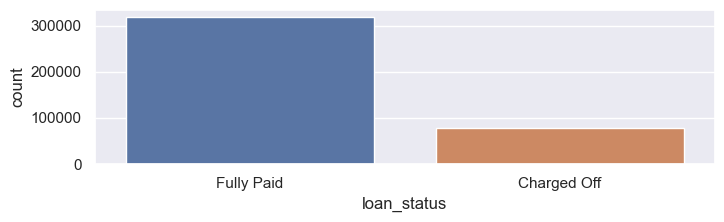

In [6]:
# Proportion of loans that are defaulted
plt.figure(figsize=(8,2))
sns.countplot(data=lc_loan, x='loan_status')

<Axes: xlabel='loan_amnt', ylabel='Count'>

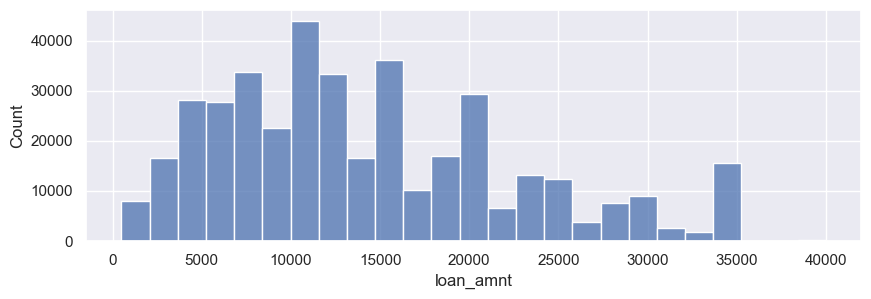

In [7]:
# Distribution of the amount borrowed for historic loans
plt.figure(figsize=(10,3))
sns.histplot(lc_loan['loan_amnt'], kde=False, bins=25)

#### As we can see, the historical amount of money borrowed concentrates around 10K USD.

#### Let's now turn loan_status to a dummy variable so we can check the correlations with each other variable

In [8]:
# We associate each element of loan_status with a 0 or a 1 in the a column
lc_loan['status_dummy'] = (lc_loan['loan_status'].map({'Fully Paid':1,'Charged Off':0})).astype(np.uint8)
lc_loan[['loan_status','status_dummy']].tail(10)

,loan_status,status_dummy
396020,Fully Paid,1
396021,Fully Paid,1
396022,Fully Paid,1
396023,Fully Paid,1
396024,Fully Paid,1
396025,Fully Paid,1
396026,Fully Paid,1
396027,Fully Paid,1
396028,Fully Paid,1
396029,Fully Paid,1


C:\Users\lol_s\AppData\Local\Temp\ipykernel_15752\2775831331.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(lc_loan.corr(), annot=True)


<Axes: >

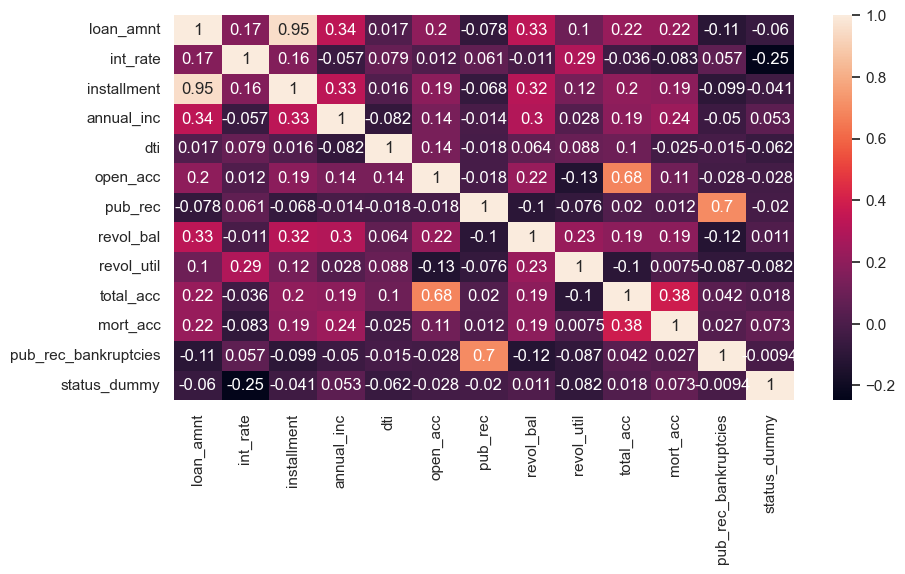

In [9]:
# Plot the correlations
plt.figure(figsize=(10,5))
sns.heatmap(lc_loan.corr(), annot=True)

####  Let's see description of the variables that show the greatest correlations

In [10]:
lc_info.set_index('LoanStatNew').loc[['installment', 'pub_rec', 'pub_rec_bankruptcies', 'open_acc', 'total_acc']]

,Description
LoanStatNew,
installment,The monthly payment owed by the borrower if the loan originates.
pub_rec,Number of derogatory public records
pub_rec_bankruptcies,Number of public record bankruptcies
open_acc,The number of open credit lines in the borrower's credit file.
total_acc,The total number of credit lines currently in the borrower's credit file


#### As expected, installment is pretty correlated to the total amount of money borrowed
#### Again, pub_rec and pub_rc_bankruptcies show similar information about public records about payment default
#### The relation between open_acc and total_acc is probably not that evident, as having a bigger or smaller record does not imply having more or less credit accounts currently open. This said, I would suggest the following reasons that make this happen (We would need more information to accept or reject them):
* The more experience a person have with credit lines, the more comfortable it feels to have them and perhaps the more that person can feel in need to have extra money for his projects
* The older the person gets, the more accounts he would have oppened and because of his age, the more money income he could have managed to get and also (related or not to the latter) the less he would worry about having a money debt

#### Correlation with status_dummy

In [11]:
# Correlations with the target feature
lc_loan.corr()['status_dummy'].abs().sort_values()

C:\Users\lol_s\AppData\Local\Temp\ipykernel_15752\3795390216.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  lc_loan.corr()['status_dummy'].abs().sort_values()


pub_rec_bankruptcies    0.009383
revol_bal               0.010892
total_acc               0.017893
pub_rec                 0.019933
open_acc                0.028012
installment             0.041082
annual_inc              0.053432
loan_amnt               0.059836
dti                     0.062413
mort_acc                0.073111
revol_util              0.082373
int_rate                0.247758
status_dummy            1.000000
Name: status_dummy, dtype: float64

<Axes: xlabel='int_rate', ylabel='Count'>

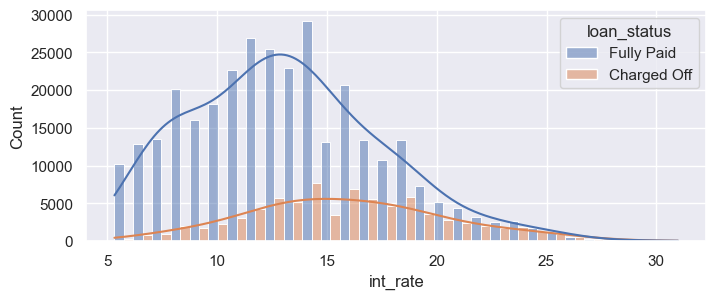

In [12]:
# Distribution with respect to the interest rate and clusterized by payment status
plt.figure(figsize=(8,3))
sns.histplot(lc_loan, x='int_rate',hue='loan_status', multiple='dodge', bins=30, kde=True, kde_kws={'bw_adjust':4}) #kde_kws is a smoothness factor

#### There's better payment rate for bigger interest rate, although the difference is not significant

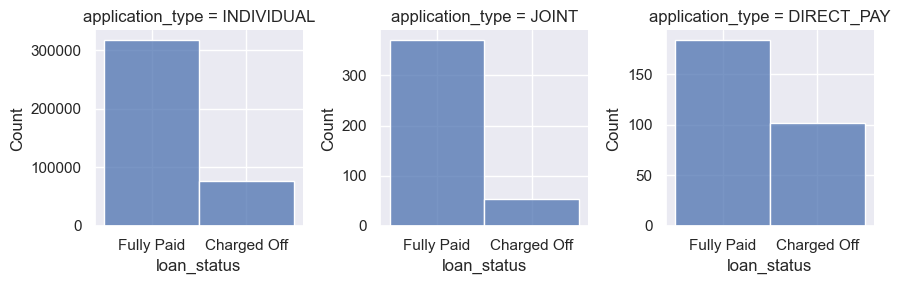

In [13]:
# Proportion of Fully paid/Charged off loans for each kind of application type
g = sns.FacetGrid(lc_loan,col='application_type', sharey=False, height=3)
#If we let share y, the 2nd and 3rd graphs would be tiny if compared to the 1st
g.map(sns.histplot,'loan_status')

#### The direct payment type is the most risky and the joint type is the least

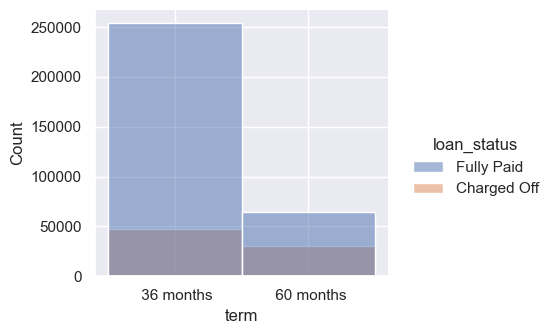

In [14]:
# Dependency of loan_status with the duration of the loan (term column)
sns.displot(lc_loan, x='term', hue='loan_status', height=3.5, aspect=1.2)

#### The proportion Fully paid vs. Charged off is much greater in loans with a 36 months duration

<Axes: xlabel='loan_status', ylabel='loan_amnt'>

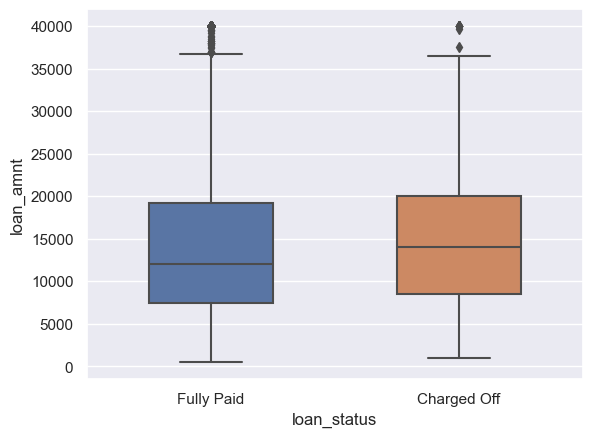

In [15]:
# Distribution of Fully loan amounts for fully paid and charged off loans
sns.boxplot(data=lc_loan, x='loan_status',y='loan_amnt', width=0.5)

<Axes: xlabel='sub_grade', ylabel='count'>

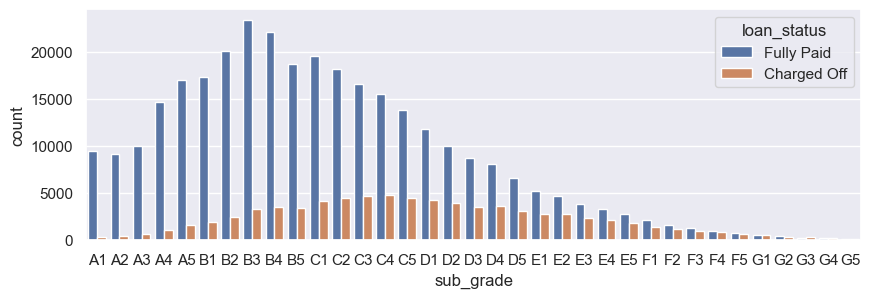

In [16]:
# Distribution of loans respect to the quality score assigned (sub_grade)
plt.figure(figsize=(10,3))
sns.countplot(data=lc_loan, x='sub_grade', hue='loan_status', order=sorted(lc_loan['sub_grade'].unique()))

#### As shown, the proportion of 'fully paid' vs. 'charged off' loans grows between the A1 and the B3 subgrades, then it keeps reducing at a decreasing rate up to the F3 subgrade and from there it's fairly constant

In [17]:
lc_info[lc_info['LoanStatNew'] == 'initial_list_status'].Description

24    The initial listing status of the loan. Possible values are – W, F
Name: Description, dtype: object

#### W Loans are a random set of loans which were initially available for whole purchase for investors

<Axes: xlabel='initial_list_status', ylabel='Count'>

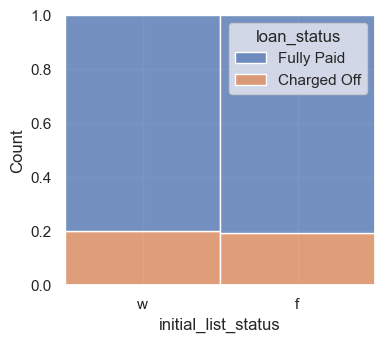

In [18]:
# Dependency of loan_status with the initial list status
plt.figure(figsize=(4,3.5))
sns.histplot(lc_loan, x='initial_list_status', hue='loan_status', multiple='fill')

## 2. Data transformation
### 2.1. Direct transformations

In [19]:
lc_loan.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,status_dummy
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690",1
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113",1
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113",1
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813",1
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650",0


#### We need to turn some of the features to numerical type in order to use them in our neural network

### emp_length

In [20]:
lc_loan['emp_length'].unique() #There are NaN values

array(['10+ years', '4 years', '< 1 year', '6 years', '9 years',
       '2 years', '3 years', '8 years', '7 years', '5 years', '1 year',
       nan], dtype=object)

In [21]:
def str_to_num(str):
    '''
    This function returns the input variable if it's a float, 0 if the that variable starts with < and the float number contained
    in the string variable in any other case
    '''
    if type(str)==float:
        return str
    elif str.split()[0]=='<':
        return 0
    else:
        return int(re.findall(r'-?\d+\.?\d*', str)[0])

In [22]:
lc_loan['emp_length'] = lc_loan['emp_length'].apply(str_to_num)
lc_loan['emp_length'].unique()

array([10.,  4.,  0.,  6.,  9.,  2.,  3.,  8.,  7.,  5.,  1., nan])

### Same process with 'term'

In [23]:
lc_loan['term'] = lc_loan['term'].apply(str_to_num)
lc_loan['term'].unique()

array([36, 60], dtype=int64)

### Subgrade column to numerical 
#### following the next pattern:
A1 -> 1.00   B1 -> 2.00   ...   G1 -> 7.00
<br>A2 -> 1.20   B2 -> 2.20   ...   G2 -> 7.20
<br>A3 -> 1.40   B3 -> 2.40   ...   G3 -> 7.40
<br>A4 -> 1.60   B4 -> 2.60   ...   G4 -> 7.60
<br>A5 -> 1.80   B5 -> 2.80   ...   G5 -> 7.80

In [24]:
lc_loan['sub_grade'].unique()

array(['B4', 'B5', 'B3', 'A2', 'C5', 'C3', 'A1', 'B2', 'C1', 'A5', 'E4',
       'A4', 'A3', 'D1', 'C2', 'B1', 'D3', 'D5', 'D2', 'E1', 'E2', 'E5',
       'F4', 'E3', 'D4', 'G1', 'F5', 'G2', 'C4', 'F1', 'F3', 'G5', 'G4',
       'F2', 'G3'], dtype=object)

In [25]:
def alphnum_to_num(grad):
    '''
    This function makes the letter in subgrade correspond to the integer part of an output number and the number in subgrade 
    to the decimal part of the output, i.e., it turns the alphanumerical input to numerical type
    '''
    grad_n=[]
    
    #First, we check the letter
    sep = [char for char in grad]
    if sep[0]=='A':
        grad_n.append(1)
    elif sep[0]=='B':
        grad_n.append(2)
    elif sep[0]=='C':
        grad_n.append(3)
    elif sep[0]=='D':
        grad_n.append(4)
    elif sep[0]=='E':
        grad_n.append(5)
    elif sep[0]=='F':
        grad_n.append(6)
    elif sep[0]=='G':
        grad_n.append(7)
        
    #Now let's check subgrades:
    if sep[1]=='1':
        grad_n.append(0.00)
    elif sep[1]=='2':
        grad_n.append(0.20)
    elif sep[1]=='3':
        grad_n.append(0.40)
    elif sep[1]=='4':
        grad_n.append(0.60)
    elif sep[1]=='5':
        grad_n.append(0.80)
        
    return sum(grad_n)

In [26]:
lc_loan['sub_grade'] = lc_loan['sub_grade'].apply(alphnum_to_num)
lc_loan.sub_grade.isnull().sum() # No null values

0

In [27]:
# Drop grade column
lc_loan.drop(['grade'], axis=1, inplace=True)

In [28]:
lc_loan.head()

,loan_amnt,term,int_rate,installment,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,...,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,status_dummy
0,10000.0,36,11.44,329.48,2.6,Marketing,10.0,RENT,117000.0,Not Verified,...,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690",1
1,8000.0,36,11.99,265.68,2.8,Credit analyst,4.0,MORTGAGE,65000.0,Not Verified,...,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113",1
2,15600.0,36,10.49,506.97,2.4,Statistician,0.0,RENT,43057.0,Source Verified,...,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113",1
3,7200.0,36,6.49,220.65,1.2,Client Advocate,6.0,RENT,54000.0,Not Verified,...,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813",1
4,24375.0,60,17.27,609.33,3.8,Destiny Management Inc.,9.0,MORTGAGE,55000.0,Verified,...,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650",0


## 2.2. Create dummy variables for categorical features
### application_type

In [29]:
lc_loan['application_type'].unique()

array(['INDIVIDUAL', 'JOINT', 'DIRECT_PAY'], dtype=object)

In [30]:
lc_loan = pd.get_dummies(data=lc_loan, prefix='dum', columns=['application_type'], drop_first=True)
lc_loan.head()

,loan_amnt,term,int_rate,installment,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,...,revol_bal,revol_util,total_acc,initial_list_status,mort_acc,pub_rec_bankruptcies,address,status_dummy,dum_INDIVIDUAL,dum_JOINT
0,10000.0,36,11.44,329.48,2.6,Marketing,10.0,RENT,117000.0,Not Verified,...,36369.0,41.8,25.0,w,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690",1,1,0
1,8000.0,36,11.99,265.68,2.8,Credit analyst,4.0,MORTGAGE,65000.0,Not Verified,...,20131.0,53.3,27.0,f,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113",1,1,0
2,15600.0,36,10.49,506.97,2.4,Statistician,0.0,RENT,43057.0,Source Verified,...,11987.0,92.2,26.0,f,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113",1,1,0
3,7200.0,36,6.49,220.65,1.2,Client Advocate,6.0,RENT,54000.0,Not Verified,...,5472.0,21.5,13.0,f,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813",1,1,0
4,24375.0,60,17.27,609.33,3.8,Destiny Management Inc.,9.0,MORTGAGE,55000.0,Verified,...,24584.0,69.8,43.0,f,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650",0,1,0


In [31]:
lc_loan.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'title',
       'dti', 'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'mort_acc',
       'pub_rec_bankruptcies', 'address', 'status_dummy', 'dum_INDIVIDUAL',
       'dum_JOINT'],
      dtype='object')

In [32]:
# We can rename the new columns if we want
lc_loan.rename(
    columns={"dum_INDIVIDUAL": "Individual", "dum_JOINT": "Joint"},
    inplace=True
)

### emp_title

In [33]:
# Number of unique employments
lc_loan['emp_title'].nunique()

173105

In [34]:
lc_loan['emp_title'].value_counts()[:30]

Teacher                     4389
Manager                     4250
Registered Nurse            1856
RN                          1846
Supervisor                  1830
Sales                       1638
Project Manager             1505
Owner                       1410
Driver                      1339
Office Manager              1218
manager                     1145
Director                    1089
General Manager             1074
Engineer                     995
teacher                      962
driver                       882
Vice President               857
Operations Manager           763
Administrative Assistant     756
Accountant                   748
President                    742
owner                        697
Account Manager              692
Police Officer               686
supervisor                   673
Attorney                     667
Sales Manager                665
sales                        645
Executive Assistant          642
Analyst                      623
Name: emp_

#### As there are too many different jobs, we drop emp_title

In [35]:
lc_loan.drop('emp_title', axis=1, inplace=True)

### title and purpose columns

In [36]:
lc_loan['title'].head(10)

0                   Vacation
1         Debt consolidation
2    Credit card refinancing
3    Credit card refinancing
4      Credit Card Refinance
5         Debt consolidation
6           Home improvement
7       No More Credit Cards
8         Debt consolidation
9         Debt Consolidation
Name: title, dtype: object

In [37]:
lc_loan['purpose'].head(10)

0              vacation
1    debt_consolidation
2           credit_card
3           credit_card
4           credit_card
5    debt_consolidation
6      home_improvement
7           credit_card
8    debt_consolidation
9    debt_consolidation
Name: purpose, dtype: object

#### title and purpose show about the same information. We can drop title

In [38]:
lc_loan.drop('title', axis=1, inplace=True)

In [39]:
# Number of unique values
lc_loan['purpose'].nunique()

14

#### Let's make it a dummy variable

In [40]:
lc_loan = pd.get_dummies(data=lc_loan, prefix='dum', columns=['purpose'], drop_first=True)

In [41]:
lc_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 38 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   loan_amnt               396030 non-null  float64
 1   term                    396030 non-null  int64  
 2   int_rate                396030 non-null  float64
 3   installment             396030 non-null  float64
 4   sub_grade               396030 non-null  float64
 5   emp_length              377729 non-null  float64
 6   home_ownership          396030 non-null  object 
 7   annual_inc              396030 non-null  float64
 8   verification_status     396030 non-null  object 
 9   issue_d                 396030 non-null  object 
 10  loan_status             396030 non-null  object 
 11  dti                     396030 non-null  float64
 12  earliest_cr_line        396030 non-null  object 
 13  open_acc                396030 non-null  float64
 14  pub_rec             

### home_ownership

In [42]:
lc_loan['home_ownership'].value_counts()

MORTGAGE    198348
RENT        159790
OWN          37746
OTHER          112
NONE            31
ANY              3
Name: home_ownership, dtype: int64

##### Let's join Other, None and Any into 1 category called Other

In [43]:
lc_loan['home_own'] = lc_loan['home_ownership']

In [44]:
lc_loan.head(30)

,loan_amnt,term,int_rate,installment,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,...,dum_house,dum_major_purchase,dum_medical,dum_moving,dum_other,dum_renewable_energy,dum_small_business,dum_vacation,dum_wedding,home_own
0,10000.0,36,11.44,329.48,2.6,10.0,RENT,117000.0,Not Verified,Jan-2015,...,0,0,0,0,0,0,0,1,0,RENT
1,8000.0,36,11.99,265.68,2.8,4.0,MORTGAGE,65000.0,Not Verified,Jan-2015,...,0,0,0,0,0,0,0,0,0,MORTGAGE
2,15600.0,36,10.49,506.97,2.4,0.0,RENT,43057.0,Source Verified,Jan-2015,...,0,0,0,0,0,0,0,0,0,RENT
3,7200.0,36,6.49,220.65,1.2,6.0,RENT,54000.0,Not Verified,Nov-2014,...,0,0,0,0,0,0,0,0,0,RENT
4,24375.0,60,17.27,609.33,3.8,9.0,MORTGAGE,55000.0,Verified,Apr-2013,...,0,0,0,0,0,0,0,0,0,MORTGAGE
5,20000.0,36,13.33,677.07,3.4,10.0,MORTGAGE,86788.0,Verified,Sep-2015,...,0,0,0,0,0,0,0,0,0,MORTGAGE
6,18000.0,36,5.32,542.07,1.0,2.0,MORTGAGE,125000.0,Source Verified,Sep-2015,...,0,0,0,0,0,0,0,0,0,MORTGAGE
7,13000.0,36,11.14,426.47,2.2,10.0,RENT,46000.0,Not Verified,Sep-2012,...,0,0,0,0,0,0,0,0,0,RENT
8,18900.0,60,10.99,410.84,2.4,10.0,RENT,103000.0,Verified,Oct-2014,...,0,0,0,0,0,0,0,0,0,RENT
9,26300.0,36,16.29,928.40,3.8,3.0,MORTGAGE,115000.0,Verified,Apr-2012,...,0,0,0,0,0,0,0,0,0,MORTGAGE


In [45]:
lc_loan['home_own'] = lc_loan['home_ownership'].apply(lambda x: 'OTHER' if x in ['NONE', 'ANY'] else x)
# The lambda function used returns OTHER if the input is NONE or ANY

In [46]:
lc_loan['home_own'].value_counts()

MORTGAGE    198348
RENT        159790
OWN          37746
OTHER          146
Name: home_own, dtype: int64

In [47]:
lc_loan = pd.get_dummies(data=lc_loan, prefix='dum', columns=['home_own'], drop_first=True)
lc_loan.drop(['home_ownership'], axis=1, inplace=True)          #Drop original column

In [48]:
lc_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 40 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   loan_amnt               396030 non-null  float64
 1   term                    396030 non-null  int64  
 2   int_rate                396030 non-null  float64
 3   installment             396030 non-null  float64
 4   sub_grade               396030 non-null  float64
 5   emp_length              377729 non-null  float64
 6   annual_inc              396030 non-null  float64
 7   verification_status     396030 non-null  object 
 8   issue_d                 396030 non-null  object 
 9   loan_status             396030 non-null  object 
 10  dti                     396030 non-null  float64
 11  earliest_cr_line        396030 non-null  object 
 12  open_acc                396030 non-null  float64
 13  pub_rec                 396030 non-null  float64
 14  revol_bal           

### verification_status

In [49]:
lc_loan['verification_status'].value_counts()

Verified           139563
Source Verified    131385
Not Verified       125082
Name: verification_status, dtype: int64

In [50]:
# Make it a dummy
lc_loan = pd.get_dummies(data=lc_loan, prefix='dum', columns=['verification_status'], drop_first=True)

### Issue_d

Let's recall what issue_d means

In [51]:
lc_info.columns

Index(['LoanStatNew', 'Description'], dtype='object')

In [52]:
lc_info[lc_info['LoanStatNew'] == 'issue_d'].Description

11    The month which the loan was funded
Name: Description, dtype: object

In [53]:
lc_loan['issue_d']

0         Jan-2015
1         Jan-2015
2         Jan-2015
3         Nov-2014
4         Apr-2013
            ...   
396025    Oct-2015
396026    Feb-2015
396027    Oct-2013
396028    Aug-2012
396029    Jun-2010
Name: issue_d, Length: 396030, dtype: object

#### If we can broke down issue_d into Year and Month, would both variables be treated lenearly?

In [54]:
# Save the loan month
lc_loan['loan_month'] = lc_loan['issue_d'].apply(lambda x: x[-8:-5]) # 8th position to 5th position from the end

In [55]:
lc_loan['loan_month'].value_counts()

Oct    42130
Jul    39714
Jan    34682
Nov    34068
Apr    33223
Aug    32816
Mar    31919
May    31895
Jun    30140
Dec    29082
Feb    28742
Sep    27619
Name: loan_month, dtype: int64

In [56]:
# Save the loan year
lc_loan['loan_year'] = lc_loan['issue_d'].apply(lambda x: x[-4:]).astype(np.uint16)

In [57]:
lc_loan['loan_year'].value_counts()

2014    102860
2013     97662
2015     94264
2012     41202
2016     28088
2011     17435
2010      9258
2009      3826
2008      1240
2007       195
Name: loan_year, dtype: int64

##### We have the 12 months of a Year and 10 diferent years. We can treat the "month variable categorically" as the month in which future loans will be requested will fall into one of the existing categories (the 12 months), but regarding the years, new loans will occur in future years and the values of the past won't be repeated (maybe the last year will if it's not over yet). Because of that I will try "years linearly"

#### Turn month into dummy

In [58]:
# Turn month into dummy
lc_loan = pd.get_dummies(data=lc_loan, prefix='dum_loan', columns=['loan_month'], drop_first=True)
lc_loan.drop(['issue_d'], axis=1, inplace=True)        # Drop original column

In [59]:
# Let's have a look
lc_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 52 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   loan_amnt               396030 non-null  float64
 1   term                    396030 non-null  int64  
 2   int_rate                396030 non-null  float64
 3   installment             396030 non-null  float64
 4   sub_grade               396030 non-null  float64
 5   emp_length              377729 non-null  float64
 6   annual_inc              396030 non-null  float64
 7   loan_status             396030 non-null  object 
 8   dti                     396030 non-null  float64
 9   earliest_cr_line        396030 non-null  object 
 10  open_acc                396030 non-null  float64
 11  pub_rec                 396030 non-null  float64
 12  revol_bal               396030 non-null  float64
 13  revol_util              395754 non-null  float64
 14  total_acc           

### earliest_cr_line

In [60]:
lc_loan['earliest_cr_line']

0         Jun-1990
1         Jul-2004
2         Aug-2007
3         Sep-2006
4         Mar-1999
            ...   
396025    Nov-2004
396026    Feb-2006
396027    Mar-1997
396028    Nov-1990
396029    Sep-1998
Name: earliest_cr_line, Length: 396030, dtype: object

In [61]:
# Description
lc_info[lc_info['LoanStatNew'] == 'earliest_cr_line']

,LoanStatNew,Description
18,earliest_cr_line,The month the borrower's earliest reported credit line was opened


#### Let's do the same we did with issue_d

In [62]:
# Save the first credit line year
lc_loan['earliest_cr_year'] = lc_loan['earliest_cr_line'].apply(lambda x: x[-4:]).astype(np.uint16)

# Save the first credit line month
lc_loan['earliest_cr_month'] = lc_loan['earliest_cr_line'].apply(lambda x: x[-8:-5])

# Turn month into dummy
lc_loan = pd.get_dummies(data=lc_loan, prefix='dum_ear_cr', columns=['earliest_cr_month'], drop_first=True)
lc_loan.drop(['earliest_cr_line'], axis=1, inplace=True)        # Drop original column

### Initial list status

In [63]:
# Turn month into dummy
lc_loan = pd.get_dummies(data=lc_loan, prefix='dum', columns=['initial_list_status'], drop_first=True)

### Address

In [64]:
lc_loan['address'].head()

0       0174 Michelle Gateway\nMendozaberg, OK 22690
1    1076 Carney Fort Apt. 347\nLoganmouth, SD 05113
2    87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113
3              823 Reid Ford\nDelacruzside, MA 00813
4               679 Luna Roads\nGreggshire, VA 11650
Name: address, dtype: object

In [65]:
lc_loan['zip'] = lc_loan['address'].apply(lambda x: x[-5:])

In [66]:
lc_loan['address'].apply(lambda x: x[-8:])

0         OK 22690
1         SD 05113
2         WV 05113
3         MA 00813
4         VA 11650
            ...   
396025    DC 30723
396026    LA 05113
396027    NY 70466
396028    FL 29597
396029    AR 48052
Name: address, Length: 396030, dtype: object

In [67]:
# How many State-zip code combinations are there?
lc_loan['address'].apply(lambda x: x[-8:]).nunique()

540

In [68]:
# How many different zip codes?
lc_loan['zip'].nunique()

10

Let's check how many States there are in the data

In [69]:
lc_loan['address'].apply(lambda x: x[-8:-6])

0         OK
1         SD
2         WV
3         MA
4         VA
          ..
396025    DC
396026    LA
396027    NY
396028    FL
396029    AR
Name: address, Length: 396030, dtype: object

In [70]:
# How many different States?
lc_loan['address'].apply(lambda x: x[-8:-6]).nunique()

54

#### I will just use the zipcode for now because there are too many states

In [71]:
lc_loan = pd.get_dummies(data=lc_loan, prefix='dum_zip', columns=['zip'], drop_first=True)
lc_loan.drop('address', axis=1, inplace=True)          # Drop the original column
lc_loan.head()

,loan_amnt,term,int_rate,installment,sub_grade,emp_length,annual_inc,loan_status,dti,open_acc,...,dum_w,dum_zip_05113,dum_zip_11650,dum_zip_22690,dum_zip_29597,dum_zip_30723,dum_zip_48052,dum_zip_70466,dum_zip_86630,dum_zip_93700
0,10000.0,36,11.44,329.48,2.6,10.0,117000.0,Fully Paid,26.24,16.0,...,1,0,0,1,0,0,0,0,0,0
1,8000.0,36,11.99,265.68,2.8,4.0,65000.0,Fully Paid,22.05,17.0,...,0,1,0,0,0,0,0,0,0,0
2,15600.0,36,10.49,506.97,2.4,0.0,43057.0,Fully Paid,12.79,13.0,...,0,1,0,0,0,0,0,0,0,0
3,7200.0,36,6.49,220.65,1.2,6.0,54000.0,Fully Paid,2.60,6.0,...,0,0,0,0,0,0,0,0,0,0
4,24375.0,60,17.27,609.33,3.8,9.0,55000.0,Charged Off,33.95,13.0,...,0,0,1,0,0,0,0,0,0,0


In [72]:
lc_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 71 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   loan_amnt               396030 non-null  float64
 1   term                    396030 non-null  int64  
 2   int_rate                396030 non-null  float64
 3   installment             396030 non-null  float64
 4   sub_grade               396030 non-null  float64
 5   emp_length              377729 non-null  float64
 6   annual_inc              396030 non-null  float64
 7   loan_status             396030 non-null  object 
 8   dti                     396030 non-null  float64
 9   open_acc                396030 non-null  float64
 10  pub_rec                 396030 non-null  float64
 11  revol_bal               396030 non-null  float64
 12  revol_util              395754 non-null  float64
 13  total_acc               396030 non-null  float64
 14  mort_acc            

## 3. Missing Data

In [73]:
# Number of missing values (NaNs)
lc_loan.isna().sum().sort_values()

loan_amnt                   0
dum_ear_cr_Aug              0
earliest_cr_year            0
dum_loan_Sep                0
dum_loan_Oct                0
                        ...  
dum_zip_93700               0
revol_util                276
pub_rec_bankruptcies      535
emp_length              18301
mort_acc                37795
Length: 71, dtype: int64

In [74]:
# Missing values ratio
lc_loan.isna().sum().sort_values()/len(lc_loan)*100

loan_amnt               0.000000
dum_ear_cr_Aug          0.000000
earliest_cr_year        0.000000
dum_loan_Sep            0.000000
dum_loan_Oct            0.000000
                          ...   
dum_zip_93700           0.000000
revol_util              0.069692
pub_rec_bankruptcies    0.135091
emp_length              4.621115
mort_acc                9.543469
Length: 71, dtype: float64

#### As the number of NaNs in "revol_util" and "pub_rec_bankruptcies" is relatively low, we can just drop the rows that contain those NaNs and fill the missing data in the other two columns

In [75]:
lc_loan.drop(lc_loan[lc_loan['revol_util'].isna()].index, inplace=True)
lc_loan.drop(lc_loan[lc_loan['pub_rec_bankruptcies'].isna()].index, inplace=True)
lc_loan.isna().sum().sort_values()/len(lc_loan)*100

loan_amnt                 0.000000
dum_ear_cr_Aug            0.000000
earliest_cr_year          0.000000
dum_loan_Sep              0.000000
dum_loan_Oct              0.000000
                            ...   
dum_debt_consolidation    0.000000
dum_medical               0.000000
dum_zip_93700             0.000000
emp_length                4.627814
mort_acc                  9.413768
Length: 71, dtype: float64

# 4. Scaling the data

In [76]:
lc_loan.drop(('loan_status'), axis=1, inplace=True)
lc_loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 395219 entries, 0 to 396029
Data columns (total 70 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   loan_amnt               395219 non-null  float64
 1   term                    395219 non-null  int64  
 2   int_rate                395219 non-null  float64
 3   installment             395219 non-null  float64
 4   sub_grade               395219 non-null  float64
 5   emp_length              376929 non-null  float64
 6   annual_inc              395219 non-null  float64
 7   dti                     395219 non-null  float64
 8   open_acc                395219 non-null  float64
 9   pub_rec                 395219 non-null  float64
 10  revol_bal               395219 non-null  float64
 11  revol_util              395219 non-null  float64
 12  total_acc               395219 non-null  float64
 13  mort_acc                358014 non-null  float64
 14  pub_rec_bankruptcies

In [77]:
# Create a dataframe without the dummy columns to scale just those variables

# use numpy r_ to concatenate slices
dumms = lc_loan.iloc[:,np.r_[16:36, 37:48, 49:70, 15]]
noDum = lc_loan.iloc[:,np.r_[:15, 36, 48]]

In [78]:
# We should scale the data as KNN is a distance based algorithm and it reduces biases

# Instanciate the scaler model and scale the data
scaler = MinMaxScaler()
scaled_noDum = pd.DataFrame(scaler.fit_transform(noDum), columns = noDum.columns)

In [79]:
scaled_noDum.describe()

,loan_amnt,term,int_rate,installment,sub_grade,emp_length,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies,loan_year,earliest_cr_year
count,395219.000000,395219.000000,395219.000000,395219.000000,395219.000000,376929.000000,395219.000000,395219.000000,395219.000000,395219.000000,395219.000000,395219.000000,395219.000000,358014.000000,395219.000000,395219.000000,395219.000000
mean,0.344862,0.237772,0.324195,0.274086,0.325956,0.594187,0.008522,0.001739,0.115938,0.002075,0.009093,0.060303,0.157225,0.053347,0.015215,0.737501,0.780603
std,0.211571,0.425719,0.174248,0.165181,0.194124,0.364464,0.007070,0.001803,0.057696,0.006176,0.011808,0.027390,0.079767,0.063173,0.044534,0.162861,0.104334
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.189873,0.000000,0.201402,0.154342,0.176471,0.300000,0.005169,0.001130,0.078652,0.000000,0.003464,0.040233,0.100671,0.000000,0.000000,0.666667,0.724638
50%,0.291139,0.000000,0.312037,0.236808,0.294118,0.600000,0.007351,0.001692,0.101124,0.000000,0.006419,0.061414,0.147651,0.029412,0.000000,0.777778,0.797101
75%,0.493671,0.000000,0.437476,0.363510,0.441176,1.000000,0.010337,0.002299,0.146067,0.000000,0.011258,0.081699,0.201342,0.088235,0.000000,0.888889,0.855072
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### It looks good. 

In [80]:
# Add the dummy columns
scaled_df = scaled_noDum.join(dumms, on=dumms.index)
scaled_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395219 entries, 0 to 395218
Data columns (total 70 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   loan_amnt               395219 non-null  float64
 1   term                    395219 non-null  float64
 2   int_rate                395219 non-null  float64
 3   installment             395219 non-null  float64
 4   sub_grade               395219 non-null  float64
 5   emp_length              376929 non-null  float64
 6   annual_inc              395219 non-null  float64
 7   dti                     395219 non-null  float64
 8   open_acc                395219 non-null  float64
 9   pub_rec                 395219 non-null  float64
 10  revol_bal               395219 non-null  float64
 11  revol_util              395219 non-null  float64
 12  total_acc               395219 non-null  float64
 13  mort_acc                358014 non-null  float64
 14  pub_rec_bankruptcies

## 5. Neural Network

In [81]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [82]:
scaled_df.shape # Width of 48 neurons, as the last one is the target

(395219, 70)

In [83]:
# Setting up the Neural Network

model = Sequential()

model.add(Dense(units=70, activation='relu'))   # Input layer
model.add(Dropout(0.2))
model.add(Dense(units=35, activation='relu'))   # Hidden Layer 1
model.add(Dropout(0.2))
model.add(Dense(units=12, activation='relu'))   # Hidden Layer 2
model.add(Dropout(0.2))
model.add(Dense(units=1, activation='sigmoid')) # Output layer

# For a binary classification problem : binary_crossentropy
model.compile(loss='binary_crossentropy', optimizer='adam')

### 5.1. Model training/testing

#### After trying many runs with different NN model hyperparameters and number of neighbors for the imputation ( in which the results didn't change too much), the best result was achieved with the following setup

In [84]:
imputer = KNNImputer(n_neighbors=2)
imputed_df = imputer.fit_transform(scaled_df)  # This Outputs an array

# Neural networks work with arrays
y = imputed_df[:,69]                           # status_dummy
X = imputed_df[:,:69]                          # rest of columns
    
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

model.fit(x=X_train, 
          y=y_train, 
          epochs=150,                  # number times that the learning algorithm will work through the entire training dataset
          batch_size=256,              # number of samples processed before the model is updated
          validation_data=(X_test, y_test), verbose=1,
          callbacks=[early_stop]
          )

Epoch 1/150
1158/1158 [==============================] - 3s 2ms/step - loss: 0.3145 - val_loss: 0.2685
Epoch 2/150
1158/1158 [==============================] - 2s 2ms/step - loss: 0.2674 - val_loss: 0.2619
Epoch 3/150
1158/1158 [==============================] - 2s 2ms/step - loss: 0.2634 - val_loss: 0.2611
Epoch 4/150
1158/1158 [==============================] - 2s 2ms/step - loss: 0.2618 - val_loss: 0.2612
Epoch 5/150
1158/1158 [==============================] - 2s 2ms/step - loss: 0.2609 - val_loss: 0.2608
Epoch 6/150
1158/1158 [==============================] - 2s 2ms/step - loss: 0.2598 - val_loss: 0.2602
Epoch 7/150
1158/1158 [==============================] - 2s 2ms/step - loss: 0.2593 - val_loss: 0.2609
Epoch 8/150
1158/1158 [==============================] - 2s 2ms/step - loss: 0.2589 - val_loss: 0.2608
Epoch 9/150
1158/1158 [==============================] - 2s 2ms/step - loss: 0.2589 - val_loss: 0.2606
Epoch 10/150
1158/1158 [==============================] - 2s 2ms/step - l

### Model performance

In [90]:
# Create global variables containing the predictions
pred2 = (model.predict(X_test) > 0.5).astype("int32")

print(classification_report(y_test.astype(int),pred2))

              precision    recall  f1-score   support

           0       0.92      0.48      0.63     19458
           1       0.88      0.99      0.93     79347

    accuracy                           0.89     98805
   macro avg       0.90      0.73      0.78     98805
weighted avg       0.89      0.89      0.87     98805



#### It would be better that the recall for "0" (charged-off loans) was higher, as this is the model capability to detect all the loans of this kind. Despite that, this is a normal result, given the big quantity difference between fully-paid and charged-off loans present in the data.